# Data Analyst Associate Practical Exam Submission_DataCamp



In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

## Task 1



First, we need to read the data from the csv file to get a clear picture of what it looks like

In [128]:
df = pd.read_csv(r'C:\Users\BAO NGOC\Downloads\workspace\food_claims_2212.csv')
df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


Check the data type for each columns and make adjustments if needed. Here, the data needs to be as followed 
   - claim_id : Nominal. The unique identifier of the claim. No missing values
   - time_to_close : Discrete. Any positive value. Replace missing values with the overall median time to close
   - claim_amount : Continuous. Rounded to 2 decimal places. Replace missing values with the overall median claim amount
   - amount_paid : Continuous. Rounded to 2 decimal places. Replace missing values with the overall median amount paid
   - location : Nominal. One of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”. Remove missing values.
   - individuals_on_claim : Discrete. Minimum 1 person. Replace missing value with 0
   - linked_cases : Nominal. Either TRUE or FALSE. Replace missing values with FALSE
   - cause : Nominal. One of “vegetable”, “meat” or “unknown”. Replace missing values with ‘unknown'

In [129]:
df.dtypes

claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object

We need to change the claim_amount to float64 instead of object

In [130]:
#claim_amount should be float64

df['claim_amount'] = df['claim_amount'].str.replace("[R$]", "").astype(float)
df['claim_amount']

0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64

Check null values for each columns before proceeding to other steps

In [131]:
df.isnull().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

None of the columns should have null values.So we will need to replace all the existing null values with suitable statistics later. Now check if there is any negative value in time_to_close column

In [132]:
df['time_to_close'].any() < 0

False

Jump to the next column, which is amount_paid and fill it null values with overall median

In [133]:
df['amount_paid'].fillna(df['amount_paid'].median(), inplace = True)

Check unique value in location data to decide whether or not we will need to make some change. Luckily, the data is clean 

In [134]:
#location : check unique data
print(df['location'].unique())

['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']


individuals_on_claim get the right data as well, since the min value is 1, which is valid

In [135]:
#individuals_on_claim :
df['individuals_on_claim'].min()

1

Unique values for linked_cases are incorrect, let's fill the NaN data with the correct form (False) and check once again when finish to make sure we got the right one

In [136]:
df['linked_cases'].unique()

array([False, True, nan], dtype=object)

In [137]:
#linked_cases : replace null values with FALSE
df['linked_cases'].fillna(False, inplace = True)

In [138]:
df['linked_cases'].unique()

array([False,  True])

There might be some typos when typing data manually into the table. Like the column below, we have 2 typos
' Meat' and 'VEGETABLE' and this will return the false result if we ignore the cleaning process for it. However, we
can fix this mess by replacing the wrong one with the correct form we desire

In [139]:
#cause : check unique data
print(df['cause'].unique())
df['cause'] = df['cause'].replace([' Meat', 'VEGETABLES'], ['meat', 'vegetable'])
df['cause'].unique()

['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']


array(['unknown', 'meat', 'vegetable'], dtype=object)

In [140]:
#Check the last one 
df.isnull().sum()

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

- a)
   - claim_id :             MATCH
   - time_to_close :        MATCH
   - claim_amount :         NOT MATCH since it is object type instead of float64
   - amount_paid :          NOT MATCH since it has missing values
   - location :             MATCH
   - individuals_on_claim : MATCH
   - linked_cases :         NOT MATCH since it has missing values
   - cause :                NOT MATCH since it has typo ' Meat' and 'VEGETABLES'
   
- b)
   - claim_id                 0
   - time_to_close            0
   - claim_amount             0
   - amount_paid             36
   - location                 0
   - individuals_on_claim     0
   - linked_cases            26
   - cause                    0

- c)
   - claim_amount            remove unexpected symbols and changed the column type to float 
   - amount_paid             filled missing values with overall median of the column
   - linked_cases            replaced missing values with False
   - cause                   check unique data and replace the typos with the correct written form


## Task 2

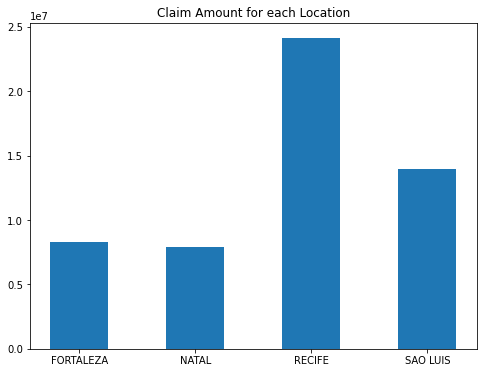

In [179]:
fig = plt.figure(figsize = (8,6))
df1= df.groupby(['location'])['claim_amount'].sum()

plt.bar([0,1,2,3],df1, 0.5)
plt.xticks([0,1,2,3], df1.index)
plt.title('Claim Amount for each Location')
plt.show()

- a) RECIFE has the most observations
- b) The observations are not balanced across categories because RECIFE accounts for nearly double the other locations

## Task 3

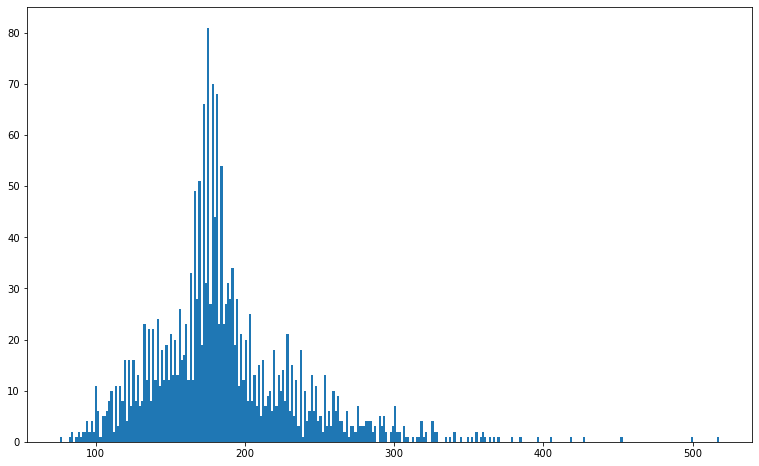

In [193]:
fig = plt.figure(figsize = (13,8))
plt.hist(df['time_to_close'], bins = 300)
plt.show()

- The claim usually takes 150-200 days before being closed
- There is a minor of claims taking around 400-500 days before being closed
- Around 190 days before being closed has the highest number of claims, which is around 80

## Task 4

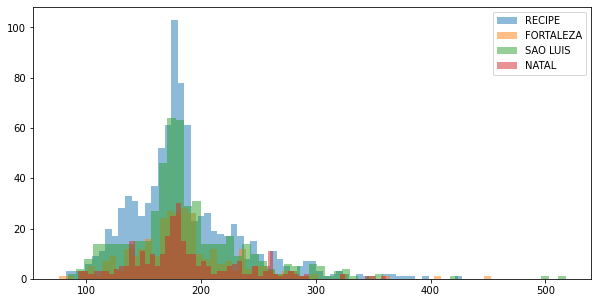

In [205]:
plt.figure(figsize=(10,5))
plt.hist(df[df['location']=='RECIFE']['time_to_close'], bins = 60, alpha = 0.5, label='RECIPE')
plt.hist(df[df['location']=='FORTALEZA']['time_to_close'], bins = 60,alpha=0.5, label='FORTALEZA')
plt.hist(df[df['location']=='SAO LUIS']['time_to_close'], bins = 60,alpha=0.5, label='SAO LUIS')
plt.hist(df[df['location']=='NATAL']['time_to_close'], bins = 60,alpha=0.5, label='NATAL')
plt.legend()
plt.show()

There is no relationship between location and time to close because there is inbalanced data for all location 

In [211]:
#Check once again using correlation
df['loc'] = df['location'].replace(['RECIFE', 'SAO LUIS', 'NATAL','FORTALEZA'],[1,2,3,4])
df['loc'].corr(df['time_to_close'])

0.00730648877907234

There is no relationship